# Medical Insurance Cost - Data Visualization Project #

### Abstract ###
<span style = "font-family: Arial; font-size: 18px;"> This in-depth analysis of medical charges, encompassing age, gender, BMI, number of children, smoking status, and geographical region, has uncovered several key findings. Notably, healthcare costs rise with age. These charges are significantly higher for smokers and exacerbated further if their BMI exceeds 30. Conversely, we found no significant variations in healthcare costs based on sex, number of children, or region of residence.</span>


### Objective ###
<span style = "font-family: Arial; font-size: 18px;"> This project is designed to conduct data analysis to establish clear relationships between medical charges and the other variables in the dataset. First, the variables in the dataset will be examined and then plotted against medical charges for a comprehensive overview. Finally, variables that display significant differences in charges will be examined more closely.  </span> 

In [350]:
#import modjules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [342]:
#import data 
data = pd.read_csv('insurance.csv')


### Dataset Examination ###

In [349]:
print(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


<span style = 'font-family: Arial; font-size: 18px;'> The dataset consists of seven variables. Four are quantitative: age, BMI, children, and charges. The other variables—sex, smoker, and region—are categorical.</span>

In [347]:
print(data.describe())


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


<span style = 'font-family: Arial; font-size: 18px;'> The dataset has 1338 observations. The mean and mode in the 'age,' 'BMI,' and 'children' variables are close together, indicating they are normally distributed. The variable 'charges' has a right-skewed distribution because the mean is larger than the median. This means that most individuals incur lower charges than a minority that have higher medical costs. </span>

In [320]:
print(data.sex.value_counts(normalize = True), data.smoker.value_counts(normalize = True), data.region.value_counts(normalize = True))

sex
male      0.505232
female    0.494768
Name: proportion, dtype: float64 smoker
no     0.795217
yes    0.204783
Name: proportion, dtype: float64 region
southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: proportion, dtype: float64


<span style = 'font-family: Arial; font-size: 18px;'>Categorical variables in the data set are 'sex,' 'smoker,' and 'region.' The dataset consists of equal numbers of male and female individuals divided almost equally between four regions. Approximately 80% of the individuals are smokers. </span>

### Comprehensive Visualization ###

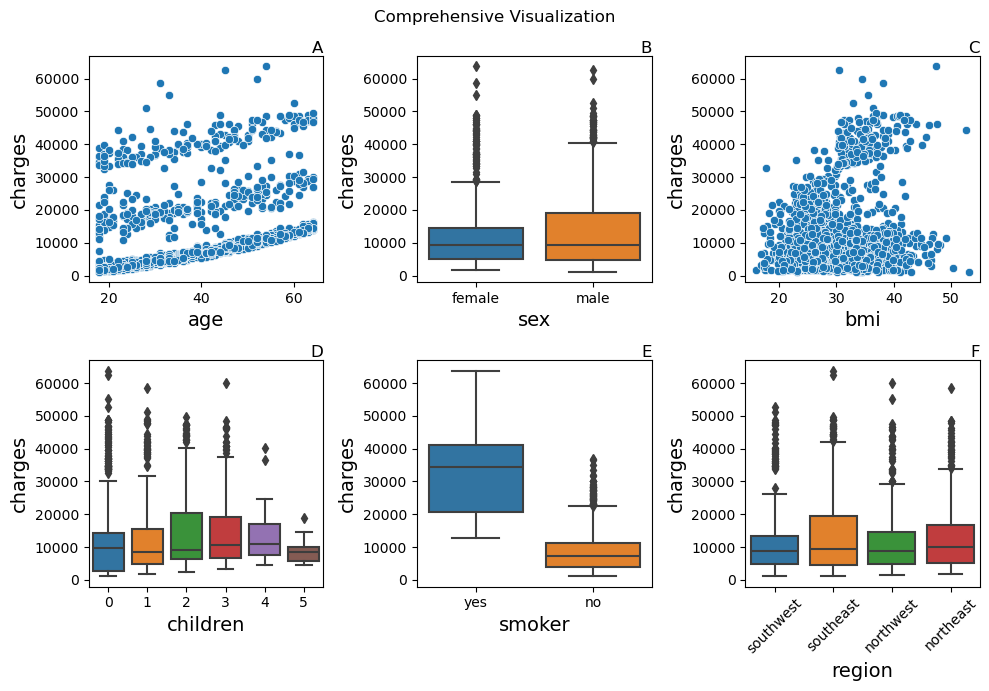

In [351]:
plt.figure(figsize = (10, 7))
plt.suptitle('Comprehensive Visualization')
plt.rcParams['axes.titlepad'] = -30
plt.rcParams['axes.titlelocation'] = 'right'
plt.rcParams['axes.labelsize'] = 14
plt.subplot(2,3,1)
sns.scatterplot(x='age', y= 'charges', data = data)
plt.title('A')
plt.subplot(2,3,2)
sns.boxplot(x=data.sex, y=data.charges)
plt.title('B')
plt.subplot(2,3,3)
sns.scatterplot(x='bmi', y= 'charges', data = data)
plt.title('C')
plt.subplot(2,3,4)
sns.boxplot(x=data.children, y=data.charges)
plt.title('D')
plt.subplot(2,3,5)
sns.boxplot(x=data.smoker, y=data.charges)
plt.title('E')
plt.subplot(2,3,6)
sns.boxplot(x=data.region, y=data.charges)
plt.title('F')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

<span style = 'font-family:Arial; font-size: 18px; font-weight: bold;'>A:</span><span style = 'font-family:Arial; font-size: 18px;'>  The scatter plot of charges versus a patient's age demonstrates a positive correlation. The charges increase gradually with age. This plot also exhibits a clear separation into three strata. This division must be due to factors affecting medical costs for all ages.</span>
<span style = 'font-family:Arial; font-size: 18px; font-weight: bold;'>B:</span><span style = 'font-family:Arial; font-size: 18px;'>  
The box plot of charges versus the sex of the insured demonstrates no significant difference between charges incurred by the male and female individuals. </span>
<span style = 'font-family:Arial; font-size: 18px; font-weight: bold;'>C:</span><span style = 'font-family:Arial; font-size: 18px;'>  The scatter plot of charges versus BMI widens at the higher BMI values. The increase indicates that at least one factor affects medical costs for individuals with a high BMI. </span>
<span style = 'font-family:Arial; font-size: 18px; font-weight: bold;'>D:</span><span style = 'font-family:Arial; font-size: 18px;'> The box plot of charges versus the insured individual's number of children indicates no significant difference in charges. </span>
<span style = 'font-family:Arial; font-size: 18px; font-weight: bold;'>E:</span><span style = 'font-family:Arial; font-size: 18px;'> The box plot of charges versus the smoker status of a patient demonstrates a significant difference between charges incurred by smoking and nonsmoking individuals. </span>
<span style = 'font-family:Arial; font-size: 18px; font-weight: bold;'>F:</span><span style = 'font-family:Arial; font-size: 18px;'> The box plot of charges versus the region where an individual resides demonstrates no significant difference in charges between regions. </span>


### Detailed Analysis of Significant Variables ###
<span style = 'font-family:Arial; font-size: 18px; '> The comprehensive visualization indicates that BMI and smoking affect medical costs. To examine the connection between these variables, the observations were divided into four categories: "Smoker, High BMI," "Smoker, Low BMI," "Non-Smoker, High BMI," and "Non-Smoker, Low BMI."</span>

In [356]:
#this function is design to go through rows in a dataset to categorize the data
def categorize(row):
    if row['smoker'] == 'yes' and row['bmi'] >= 30:
        return 'Smoker, High BMI'
    elif row['smoker'] == 'yes' and row['bmi'] < 30:
        return 'Smoker, Low BMI'
    elif row['smoker'] == 'no' and row['bmi'] >= 30:
        return 'Non-Smoker, High BMI'
    elif row['smoker'] == 'no' and row['bmi'] < 30:
        return 'Non-Smoker, Low BMI'
#Add a new column 'category' to data using .apply() and categorize function above.
data['category'] = data.apply(categorize, axis=1)

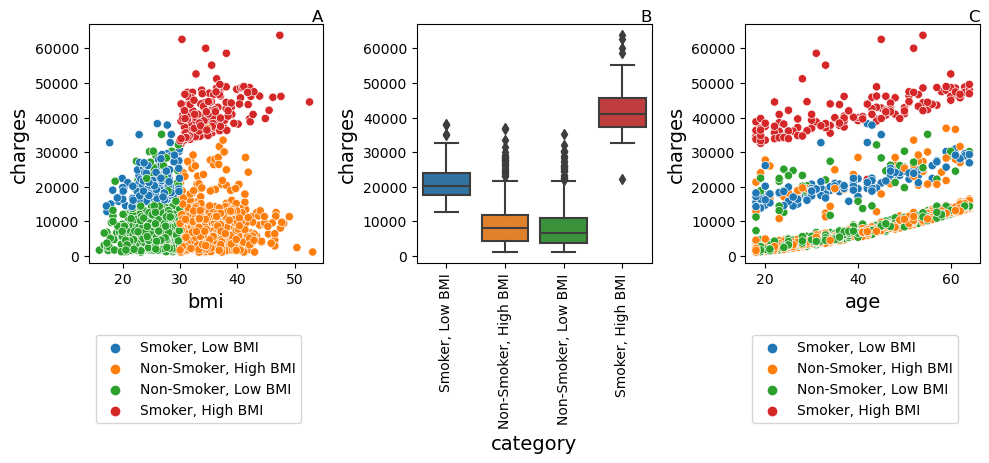

In [357]:
#plot the data 
plt.figure(figsize = (10,6))

plt.rcParams['axes.titlepad'] = -30
plt.rcParams['axes.titlelocation'] = 'right'
plt.subplot(1,3,1)
sns.scatterplot(x = 'bmi', y = 'charges', data = data, hue = 'category')
plt.title('A')
plt.legend(loc='lower left', bbox_to_anchor=(0, -0.7))
plt.subplot(1,3,2)
sns.boxplot(x= data.category, y = data.charges)
plt.title('B')
plt.xticks(rotation = 90)
plt.subplot(1,3,3)
sns.scatterplot(x= 'age', y = 'charges', data = data, hue = 'category')
plt.title('C')
plt.legend(loc='lower left', bbox_to_anchor=(0, -0.7))
plt.tight_layout()
plt.show()

<span style = 'font-family:Arial; font-size: 18px; font-weight: bold;'>A:</span><span style = 'font-family:Arial; font-size: 18px;'> The scatter plot of medical charges versus BMI, colored by the smoker/BMI category, reveals four distinct clusters.  </span>

<span style = 'font-family:Arial; font-size: 18px; font-weight: bold;'>B:</span><span style = 'font-family:Arial; font-size: 18px;'>  The box plot, depicting the same data as in subplot A, more effectively illustrates that BMI does not significantly impact medical charges for nonsmoking individuals. However, it distinctly highlights substantial differences in charges between smokers and non-smokers, as well as between smokers with low BMI and those with high BMI.  </span>

<span style = 'font-family:Arial; font-size: 18px; font-weight: bold;'>C:</span><span style = 'font-family:Arial; font-size: 18px;'>  The plot of charges versus age is colored by the smoker/BMI category. These categories explain the three strata. The lowest charges are incurred by non-smokers regardless of BMI. The middle strata is composed primarily of smokers with low BMI, whereas the highest charges are incurred by smokers with high BMI. </span>

### Conclusion ###
<span style = 'font-family: Arial; font-size: 18px'> The visualization of these data provide convincing evidence that:
(i) Smoking increases medical costs regardless of BMI.
(ii) Non-smoking individuals with high BMI are unlikely to incurre more medical charges than those with low BMI
(iii) Smoking incease medical costs in low and high BMI individuals with a high BMI idividuals smokers having higher charges than the low BMI smokers. 
(iv) The relation between BMI, smoking status and charges is true for all ages.</span>